In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('D3.csv')

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
insulin                     0
change                      0
diabetesMed                 0
readmitted                  0
dtype: int64

In [14]:
# insert this code in a file dm_tools.py so that you don't have to write this everytime you build a new model.
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

def data_prep():
    
    df = pd.read_csv('D3.csv')
    df.dropna(inplace=True)
    
    # one-hot encoding
    df = pd.get_dummies(df)
    
    # target/input split
    y = df['readmitted']
    X = df.drop(['readmitted'], axis=1)

    # setting random state
    rs = 10

    X_mat = X.to_numpy()
    X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=rs)
    
    return df,X,y,X_train, X_test, y_train, y_test

In [15]:
df,X,y,X_train, X_test, y_train, y_test = data_prep()

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

rs = 10
# simple decision tree training
model = DecisionTreeClassifier(random_state=rs)
model.fit(X_train, y_train)

# print model parameters
print(model.get_params(deep = True))

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 10, 'splitter': 'best'}


In [17]:
print("Train accuracy:", model.score(X_train, y_train))

Train accuracy: 1.0


In [18]:
print("Test accuracy:", model.score(X_test, y_test))

Test accuracy: 0.5604467805519053


In [19]:
print("Number of Nodes:", model.tree_.node_count)
print("Number of Leaves:", model.get_n_leaves())

Number of Nodes: 19375
Number of Leaves: 9688


In [22]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.59      0.59      8184
           1       0.52      0.52      0.52      7036

    accuracy                           0.56     15220
   macro avg       0.56      0.56      0.56     15220
weighted avg       0.56      0.56      0.56     15220



In [23]:
import numpy as np

# grab feature importances from the model and feature name from the original X
importances = model.feature_importances_
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]

for i in indices:
    print(feature_names[i], ':', importances[i])

num_lab_procedures : 0.15276574246359387
num_medications : 0.12595962051503864
time_in_hospital : 0.0749103327774739
number_inpatient : 0.06712857424519109
discharge_disposition_id : 0.05508692038402521
num_procedures : 0.05365582676727815
number_diagnoses : 0.039047290132583845
admission_type_id : 0.027481828731193796
number_outpatient : 0.022708685805022662
admission_source_id : 0.020297776256988895
number_emergency : 0.014062308492220078
change : 0.013857022253296084
gender_Female : 0.013053932724644007
age_[60-70) : 0.013041757823685114
medical_specialty_Invalid : 0.012541562865225812
age_[70-80) : 0.012468909260215816
age_[50-60) : 0.012040623307829568
A1Cresult_None : 0.011374746100766593
gender_Male : 0.011085957855076567
age_[80-90) : 0.011053709913565008


In [24]:
from sklearn.model_selection import GridSearchCV
# grid search CV
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(1, 16),
          'min_samples_leaf': range(0, 25, 5)[1:]}

cv_1 = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs),return_train_score=True, cv=10)
cv_1.fit(X_train, y_train)

result_set = cv_1.cv_results_
print(result_set)

gv_estimator= cv_1.best_estimator_

{'mean_fit_time': array([0.38769515, 0.34999199, 0.33919199, 0.33468907, 0.41701052,
       0.43500192, 0.43776376, 0.44046059, 0.50422549, 0.50992529,
       0.48516791, 0.47856712, 0.56329935, 0.62547891, 0.66613643,
       0.68127174, 0.76625769, 0.7741622 , 0.76200967, 0.74451034,
       0.78433154, 0.6650744 , 0.70625863, 0.6198652 , 0.73596885,
       0.78074946, 0.87438369, 0.79867969, 0.78807282, 0.70144665,
       0.79858444, 0.68815207, 0.80569725, 0.7873462 , 0.85602951,
       0.78352778, 0.79525189, 0.74060407, 0.77657986, 0.79594827,
       0.82568712, 0.82817388, 0.88097408, 0.87035766, 0.94239824,
       0.85343916, 0.91116514, 1.0046129 , 1.03508124, 1.03188074,
       1.05454342, 0.97648761, 1.00274181, 0.89438019, 0.8475045 ,
       0.87243898, 1.029368  , 0.96805639, 0.87073071, 0.89068882,
       0.35738449, 0.35144901, 0.38600006, 0.34820452, 0.48596144,
       0.42367661, 0.42655284, 0.52512035, 0.65513034, 0.63785632,
       0.54055462, 0.57679796, 0.57740297, 0

In [25]:
print("Number of Nodes:", gv_estimator.tree_.node_count)
print("Number of Leaves:", gv_estimator.get_n_leaves())

Number of Nodes: 197
Number of Leaves: 99


In [26]:
import matplotlib.pyplot as plt

train_result = result_set['split0_train_score']
test_result = result_set['split0_test_score']
print("Total number of models: ", len(test_result))

Total number of models:  120


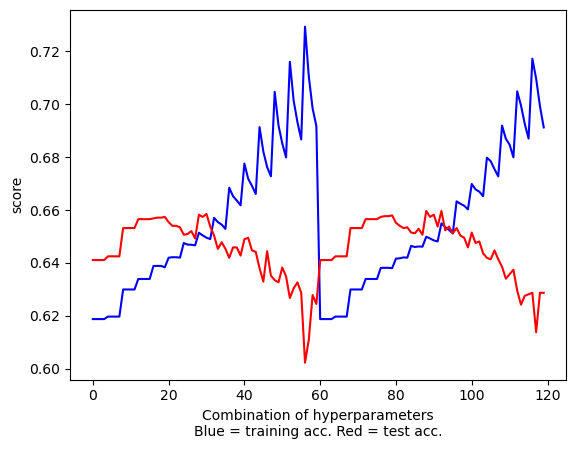

In [27]:
# plot max depth hyperparameter values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Combination of hyperparameters\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.show()

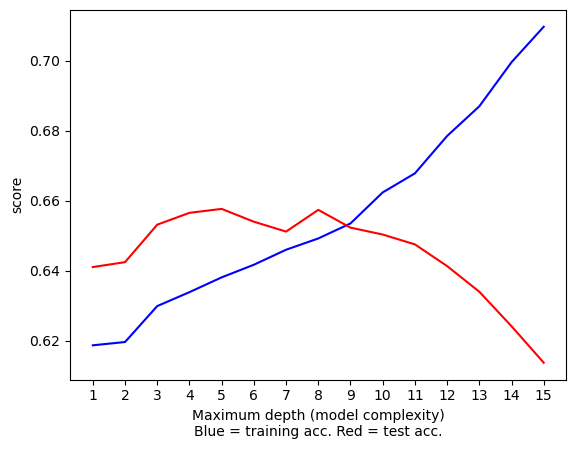

In [28]:
result_set['params']
dd = pd.DataFrame(result_set['params'])

index_ = list(dd.index[(dd['criterion']=='entropy') & (dd['min_samples_leaf']==10)])
max_depth_train = []
max_depth_test = []
for i in range(0,len(index_)):
    max_depth_train.append(train_result[index_[i]])
    max_depth_test.append(test_result[index_[i]])
plt.plot(range(1, len(max_depth_train)+1), max_depth_train, 'b', range(1,len(max_depth_test)+1), max_depth_test, 'r')
plt.xlabel('Maximum depth (model complexity)\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.xticks(np.arange(1, len(max_depth_train)+1, 1))
plt.show()

In [29]:
print(cv_1.best_params_)

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 15}


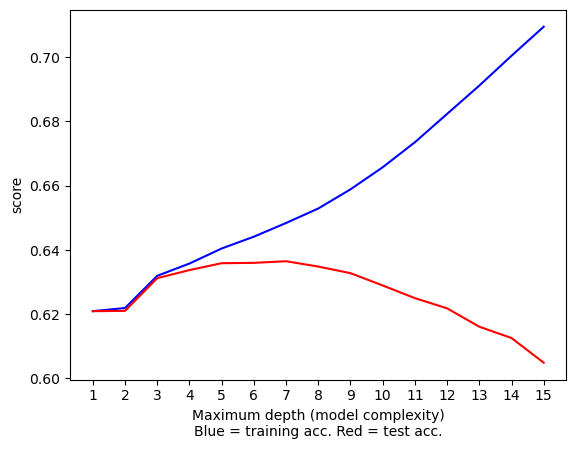

In [30]:
train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']

max_depth_train = []
max_depth_test = []
index_
for i in range(len(index_)):
    max_depth_train.append(train_result[index_[i]])
    max_depth_test.append(test_result[index_[i]])
plt.plot(range(1, len(max_depth_train)+1), max_depth_train, 'b', range(1,len(max_depth_test)+1), max_depth_test, 'r')
plt.xlabel('Maximum depth (model complexity)\nBlue = training acc. Red = test acc.')
plt.xticks(np.arange(1, len(max_depth_train)+1, 1))
plt.ylabel('score')
plt.show()

In [31]:
cv_1.fit(X_train, y_train)

print("Train accuracy:", cv_1.score(X_train, y_train))
print("Test accuracy:", cv_1.score(X_test, y_test))

Train accuracy: 0.6467672899301644
Test accuracy: 0.640670170827858


In [34]:
from dm_tools import analyse_feature_importance, visualize_decision_tree

analyse_feature_importance(cv_1.best_estimator_, X.columns, 20)
visualize_decision_tree(cv_1.best_estimator_, X.columns, "optimal_tree.png")

number_inpatient : 0.5124390170845688
discharge_disposition_id : 0.1807736356322602
number_emergency : 0.05138292813765368
number_outpatient : 0.04097336768072232
number_diagnoses : 0.034998689159357096
diabetesMed : 0.029786940701675046
num_lab_procedures : 0.02776718554443898
medical_specialty_Invalid : 0.021659899376895945
num_medications : 0.018063101031205727
race_Caucasian : 0.011189253433262585
age_[80-90) : 0.007840017784502055
medical_specialty_InternalMedicine : 0.00748667197007605
admission_source_id : 0.00689616379429757
num_procedures : 0.005121322707953348
medical_specialty_Surgery-Cardiovascular/Thoracic : 0.005096281063767113
insulin_Up : 0.005077783330278622
admission_type_id : 0.004276511699128996
A1Cresult_>8 : 0.0033494465993485893
time_in_hospital : 0.003316160170573951
max_glu_serum_>300 : 0.003232277064011928


TypeError: 'Dot' object is not subscriptable

In [35]:
dt_cv_best = cv_1.best_estimator_
# probability prediction from decision tree
y_pred_proba_dt = dt_cv_best.predict_proba(X_test)

print("Probability produced by decision tree for each class vs actual prediction on readmitted (0 = not readmission, 1 = readmitted). You should be able to see the default threshold of 0.5.")
print("(Probs on zero)\t(probs on one)\t(prediction made)")
# print top 10
for i in range(20):
    print(y_pred_proba_dt[i][0], '\t', y_pred_proba_dt[i][1], '\t', y_pred[i])

Probability produced by decision tree for each class vs actual prediction on TargetB (0 = non-donor, 1 = donor). You should be able to see the default threshold of 0.5.
(Probs on zero)	(probs on one)	(prediction made)
0.4408695652173913 	 0.5591304347826087 	 1
0.5213675213675214 	 0.47863247863247865 	 1
0.6269417763547966 	 0.37305822364520336 	 0
0.39978563772775993 	 0.6002143622722401 	 1
0.5213675213675214 	 0.47863247863247865 	 0
0.6017369727047146 	 0.39826302729528534 	 1
0.4413793103448276 	 0.5586206896551724 	 1
0.39978563772775993 	 0.6002143622722401 	 1
0.5620608899297423 	 0.4379391100702576 	 1
0.7794985250737463 	 0.2205014749262537 	 1
0.6915167095115681 	 0.30848329048843187 	 0
0.43070751276440555 	 0.5692924872355944 	 0
0.6269417763547966 	 0.37305822364520336 	 0
0.4413793103448276 	 0.5586206896551724 	 0
0.44881889763779526 	 0.5511811023622047 	 0
0.5213675213675214 	 0.47863247863247865 	 1
0.6269417763547966 	 0.37305822364520336 	 1
0.7794985250737463 	 0

In [36]:
from sklearn.metrics import roc_auc_score

y_pred_proba_dt = model.predict_proba(X_test)
y_pred_proba_dt_cv = dt_cv_best.predict_proba(X_test)

roc_index_dt = roc_auc_score(y_test, y_pred_proba_dt[:, 1])
roc_index_dt_cv = roc_auc_score(y_test, y_pred_proba_dt_cv[:, 1])

print("ROC index on test for DT_default:", roc_index_dt)
print("ROC index on test for DT_optimal:", roc_index_dt_cv)

ROC index on test for DT_default: 0.5579118103405639
ROC index on test for DT_optimal: 0.6733254114991356


In [37]:
from sklearn.metrics import roc_curve

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt[:,1])
fpr_dt_cv, tpr_dt_cv, thresholds_dt_cv = roc_curve(y_test, y_pred_proba_dt_cv[:,1])

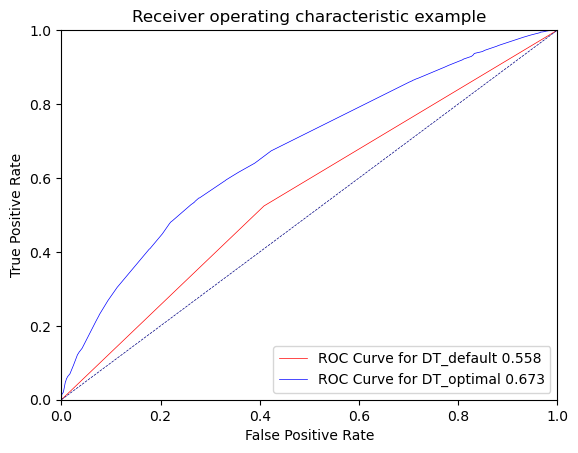

In [38]:
import matplotlib.pyplot as plt

plt.plot(fpr_dt, tpr_dt, label='ROC Curve for DT_default {:.3f}'.format(roc_index_dt), color='red', lw=0.5)
plt.plot(fpr_dt_cv, tpr_dt_cv, label='ROC Curve for DT_optimal {:.3f}'.format(roc_index_dt_cv), color='blue', lw=0.5)

plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [39]:
import pickle
dt_best = cv_1
with open('DT.pickle', 'wb') as f:
    pickle.dump([dt_best,roc_index_dt_cv, fpr_dt_cv, tpr_dt_cv], f)

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from dm_tools import data_prep

# set the random seed - consistent
rs = 10

# load the data
df,X,y,X_train, X_test, y_train, y_test = data_prep()

In [41]:
from sklearn.preprocessing import StandardScaler

# initialise a standard scaler object
scaler = StandardScaler()

# visualise min, max, mean and standard dev of data before scaling
print("Before scaling\n-------------")
for i in range(5):
    col = X_train[:,i]
    print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}".
          format(i, min(col), max(col), np.mean(col), np.std(col)))

# learn the mean and std.dev of variables from training data
# then use the learned values to transform training data
X_train = scaler.fit_transform(X_train, y_train)

print("After scaling\n-------------")
for i in range(5):
    col = X_train[:,i]
    print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}".
          format(i, min(col), max(col), np.mean(col), np.std(col)))

# use the statistic that you learned from training to transform test data
# NEVER learn from test data, this is supposed to be a set of dataset
# that the model has never seen before
X_test = scaler.transform(X_test)

Before scaling
-------------
Variable #0: min 1, max 8, mean 1.82 and std dev 1.21
Variable #1: min 1, max 28, mean 3.18 and std dev 4.39
Variable #2: min 1, max 25, mean 5.21 and std dev 3.10
Variable #3: min 1, max 14, mean 4.24 and std dev 2.87
Variable #4: min 1, max 121, mean 43.89 and std dev 19.99
After scaling
-------------
Variable #0: min -0.6762802722470845, max 5.088695386895924, mean -0.00 and std dev 1.00
Variable #1: min -0.4967504972081387, max 5.647422603089802, mean -0.00 and std dev 1.00
Variable #2: min -1.3593324563346019, max 6.382349739084745, mean 0.00 and std dev 1.00
Variable #3: min -1.1297799677610392, max 3.404898958986864, mean -0.00 and std dev 1.00
Variable #4: min -2.1451034047124797, max 3.856792422546743, mean 0.00 and std dev 1.00


In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
model = LogisticRegression(random_state=rs)

# fit it to training data
model.fit(X_train, y_train)

LogisticRegression(random_state=10)

In [46]:
# training and test accuracy
print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))

# classification report on test data
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

Train accuracy: 0.6333633701284073
Test accuracy: 0.6301576872536137
              precision    recall  f1-score   support

           0       0.62      0.79      0.70      8184
           1       0.64      0.45      0.53      7036

    accuracy                           0.63     15220
   macro avg       0.63      0.62      0.61     15220
weighted avg       0.63      0.63      0.62     15220



In [47]:
print(model.coef_)

[[-1.52460379e-02 -5.47191854e-02 -1.04771220e-02 -4.42512439e-03
   4.24745548e-02 -6.41417352e-02  4.82328014e-02  1.14943336e-01
   2.76292299e-01  4.95510199e-01  9.25778147e-02  2.89915809e-02
   1.65250676e-01  2.44075989e-03 -3.61080129e-02  3.26819370e-02
  -5.69749642e-02 -2.34228289e-02  1.94333072e-02 -1.89610849e-02
  -4.43943233e-02 -2.33757592e-02  1.36577023e-03 -4.30331502e-02
  -5.77399929e-02 -3.95289112e-02 -1.81877614e-02  1.70326557e-02
   3.85610489e-02  4.01889368e-02 -3.05389606e-02  0.00000000e+00
  -2.69416025e-02  3.07143799e-02 -1.16223059e-02  3.06660127e-02
   1.65630963e-02 -2.02073805e-02  2.57920255e-03  2.16813393e-02
  -1.00268162e-02  9.14032386e-03 -1.03838199e-03 -1.14031025e-02
   4.72860627e-03 -7.93783197e-02  6.65561249e-02 -6.68856581e-03
  -8.21426639e-03 -4.13356497e-02 -2.06040467e-02 -5.03234114e-02
  -3.67167539e-03 -9.44436019e-03 -3.32427865e-02 -5.74143580e-02
  -1.87706149e-02 -2.19255022e-02  6.60832252e-03 -6.18301194e-02
   6.88901

In [48]:
feature_names = X.columns
coef = model.coef_[0]

# limit to 20 features, you can comment the following line to print out everything
coef = coef[:20]

for i in range(len(coef)):
    print(feature_names[i], ':', coef[i])

admission_type_id : -0.015246037868945342
discharge_disposition_id : -0.05471918536976819
admission_source_id : -0.0104771220284336
time_in_hospital : -0.004425124388216802
num_lab_procedures : 0.04247455480533651
num_procedures : -0.0641417352098421
num_medications : 0.04823280144391402
number_outpatient : 0.11494333562360892
number_emergency : 0.2762922987384466
number_inpatient : 0.4955101988911914
number_diagnoses : 0.09257781467854519
change : 0.028991580940843812
diabetesMed : 0.16525067616117436
race_AfricanAmerican : 0.0024407598851916993
race_Asian : -0.036108012885501396
race_Caucasian : 0.03268193700044229
race_Hispanic : -0.05697496417354367
race_Other : -0.023422828943301662
gender_Female : 0.01943330716660219
gender_Male : -0.018961084865317265


In [49]:
# grab feature importances from the model and feature name from the original X
coef = model.coef_[0]
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(np.absolute(coef))
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]

for i in indices:
    print(feature_names[i], ':', coef[i])

number_inpatient : 0.4955101988911914
number_emergency : 0.2762922987384466
diabetesMed : 0.16525067616117436
number_outpatient : 0.11494333562360892
number_diagnoses : 0.09257781467854519
medical_specialty_InternalMedicine : -0.0793783196589119
insulin_Steady : -0.06910914279576273
medical_specialty_Invalid : 0.066556124872997
num_procedures : -0.0641417352098421
medical_specialty_Pathology : -0.06183011938834693
medical_specialty_Surgery-Cardiovascular/Thoracic : -0.060973958672396085
age_[30-40) : -0.05773999290818194
medical_specialty_Orthopedics-Reconstructive : -0.05741435804786538
medical_specialty_Surgery-Maxillofacial : -0.05701327438192178
race_Hispanic : -0.05697496417354367
discharge_disposition_id : -0.05471918536976819
medical_specialty_ObstetricsandGynecology : -0.05032341142051623
num_medications : 0.04823280144391402
max_glu_serum_>300 : 0.0476767317498469
medical_specialty_Surgery-Pediatric : 0.04646641904078755


In [50]:
# grid search CV
params = {'C': [pow(10, x) for x in range(-6, 4)]}

# use all cores to tune logistic regression with C parameter
cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs),return_train_score=True, cv=10, n_jobs=-1)
cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=10), n_jobs=-1,
             param_grid={'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10,
                               100, 1000]},
             return_train_score=True)

In [51]:
result_set = cv.cv_results_
print(result_set)

{'mean_fit_time': array([0.52351146, 0.47401896, 0.47795861, 0.67946525, 1.03206086,
       1.04793165, 1.27659335, 1.42249999, 1.4494051 , 1.24312289]), 'std_fit_time': array([0.04877692, 0.03175775, 0.02320023, 0.03401971, 0.10831711,
       0.13552299, 0.13048875, 0.08916272, 0.05686603, 0.12437582]), 'mean_score_time': array([0.00861576, 0.00889707, 0.00905077, 0.00977981, 0.01278   ,
       0.00927224, 0.01459222, 0.00970995, 0.0135397 , 0.00482357]), 'std_score_time': array([0.00218594, 0.00328854, 0.00233052, 0.00418514, 0.00496981,
       0.00418789, 0.01837157, 0.01259855, 0.01290223, 0.00140421]), 'param_C': masked_array(data=[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                   1000],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 1e-06}, {'C': 1e-05}, {'C': 0.0001}, {'C': 0.001}, {'C': 0.01}, {'C': 0.1}, {'C': 1}, {'C': 10}, {'C'

Total number of models:  10


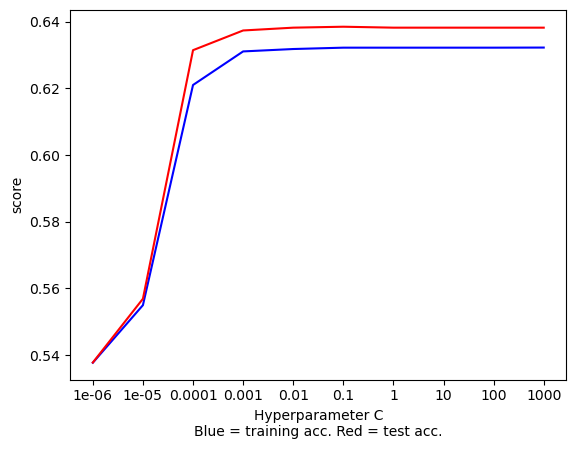

In [52]:
import matplotlib.pyplot as plt
train_result = result_set['split0_train_score']
test_result = result_set['split0_test_score']
print("Total number of models: ", len(test_result))
# plot Hyperparameter C values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter C\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),[pow(10, x) for x in range(-6, 4)])
plt.ylabel('score')
plt.show()

Total number of models:  10


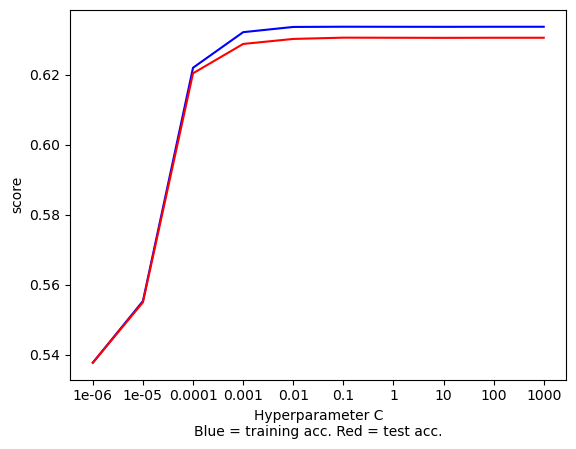

In [53]:
import matplotlib.pyplot as plt

train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']
print("Total number of models: ", len(test_result))
# plot Hyperparameter C values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter C\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),[pow(10, x) for x in range(-6, 4)])
plt.ylabel('score')
plt.show()

In [54]:
print(cv.best_params_)

{'C': 0.1}


In [55]:
cv.fit(X_train, y_train)

print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))

Train accuracy: 0.6333352106330254
Test accuracy: 0.6302890932982917


In [56]:
from sklearn.feature_selection import RFECV

rfe = RFECV(estimator = LogisticRegression(random_state=rs), cv=10)
rfe.fit(X_train, y_train) # run the RFECV

# comparing how many variables before and after
print("Original feature set", X_train.shape[1])
print("Number of features after elimination", rfe.n_features_)

Original feature set 125
Number of features after elimination 73


In [57]:
X_train_sel = rfe.transform(X_train)
X_test_sel = rfe.transform(X_test)

In [58]:
# grid search CV
params = {'C': [pow(10, x) for x in range(-6, 4)]}

rfe_cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs), cv=10, n_jobs=-1)
rfe_cv.fit(X_train_sel, y_train)

# test the best model
print("Train accuracy:", rfe_cv.score(X_train_sel, y_train))
print("Test accuracy:", rfe_cv.score(X_test_sel, y_test))

y_pred = rfe_cv.predict(X_test_sel)
print(classification_report(y_test, y_pred))

# print parameters of the best model
print(rfe_cv.best_params_)

Train accuracy: 0.6337012840729894
Test accuracy: 0.6304862023653088
              precision    recall  f1-score   support

           0       0.62      0.79      0.70      8184
           1       0.64      0.45      0.53      7036

    accuracy                           0.63     15220
   macro avg       0.63      0.62      0.61     15220
weighted avg       0.63      0.63      0.62     15220

{'C': 100}


In [59]:
import pickle
with open('DT.pickle', 'rb') as f:
    dt_best,roc_index_dt_cv, fpr_dt_cv, tpr_dt_cv = pickle.load(f)
#dt_best.fit(X_train, y_train)

print(dt_best.best_params_)

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 15}


In [60]:
from dm_tools import analyse_feature_importance

# analyse feature importance from the tuned decision tree
analyse_feature_importance(dt_best.best_estimator_, X.columns)

number_inpatient : 0.5124390170845688
discharge_disposition_id : 0.1807736356322602
number_emergency : 0.05138292813765368
number_outpatient : 0.04097336768072232
number_diagnoses : 0.034998689159357096
diabetesMed : 0.029786940701675046
num_lab_procedures : 0.02776718554443898
medical_specialty_Invalid : 0.021659899376895945
num_medications : 0.018063101031205727
race_Caucasian : 0.011189253433262585
age_[80-90) : 0.007840017784502055
medical_specialty_InternalMedicine : 0.00748667197007605
admission_source_id : 0.00689616379429757
num_procedures : 0.005121322707953348
medical_specialty_Surgery-Cardiovascular/Thoracic : 0.005096281063767113
insulin_Up : 0.005077783330278622
admission_type_id : 0.004276511699128996
A1Cresult_>8 : 0.0033494465993485893
time_in_hospital : 0.003316160170573951
max_glu_serum_>300 : 0.003232277064011928


In [61]:
from sklearn.feature_selection import SelectFromModel

# use the trained best decision tree from GridSearchCV to select features
# supply the prefit=True parameter to stop SelectFromModel to re-train the model
selectmodel = SelectFromModel(dt_best.best_estimator_, prefit=True)
X_train_sel_model = selectmodel.transform(X_train)
X_test_sel_model = selectmodel.transform(X_test)

print(X_train_sel_model.shape)

(35512, 10)


In [62]:
params = {'C': [pow(10, x) for x in range(-6, 4)]}

### For the params given, build a logistic regression model with GridSearch.

cv_sel_model = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs), cv=10, n_jobs=-1)
cv_sel_model.fit(X_train_sel_model, y_train)

print("Train accuracy:", cv_sel_model.score(X_train_sel_model, y_train))
print("Test accuracy:", cv_sel_model.score(X_test_sel_model, y_test))

# test the best model
y_pred = cv_sel_model.predict(X_test_sel_model)
print(classification_report(y_test, y_pred))

# print parameters of the best model
print(cv_sel_model.best_params_)

Train accuracy: 0.6298434332056769
Test accuracy: 0.6260183968462549
              precision    recall  f1-score   support

           0       0.62      0.81      0.70      8184
           1       0.65      0.41      0.50      7036

    accuracy                           0.63     15220
   macro avg       0.63      0.61      0.60     15220
weighted avg       0.63      0.63      0.61     15220

{'C': 0.1}


In [63]:
### Enter your code 
from sklearn.metrics import roc_auc_score

y_pred_proba_lr = model.predict_proba(X_test)
y_pred_proba_lr_cv = cv.predict_proba(X_test)
y_pred_proba_rfe_cv = rfe_cv.predict_proba(X_test_sel)
y_pred_proba_cv_sel_model = cv_sel_model.predict_proba(X_test_sel_model)


roc_index_lr = roc_auc_score(y_test, y_pred_proba_lr[:, 1])
roc_index_lr_cv = roc_auc_score(y_test, y_pred_proba_lr_cv[:, 1])
roc_index_rfe_cv = roc_auc_score(y_test, y_pred_proba_rfe_cv[:, 1])
roc_index_cv_sel_model = roc_auc_score(y_test, y_pred_proba_cv_sel_model[:, 1])

print("ROC index on test for `model`:", roc_index_lr)
print("ROC index on test for `cv`:", roc_index_lr_cv)
print("ROC index on test for `rfe_cv`:", roc_index_rfe_cv)
print("ROC index on test for `cv_sel_model`:", roc_index_cv_sel_model)

ROC index on test for `model`: 0.6716160069398712
ROC index on test for `cv`: 0.6716078794880901
ROC index on test for `rfe_cv`: 0.6714264966459327
ROC index on test for `cv_sel_model`: 0.6627959938053536


In [64]:
from sklearn.metrics import roc_curve

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba_lr[:,1])
fpr_lr_cv, tpr_lr_cv, thresholds_lr_cv = roc_curve(y_test, y_pred_proba_lr_cv[:,1])
fpr_rfe_cv, tpr_rfe_cv, thresholds_rfe_cv = roc_curve(y_test, y_pred_proba_rfe_cv[:,1])
fpr_cv_sel_model, tpr_cv_sel_model, thresholds_cv_sel_model = roc_curve(y_test, y_pred_proba_cv_sel_model[:,1])

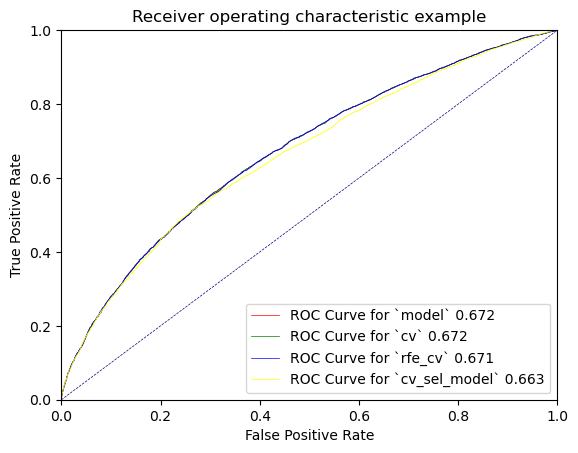

In [65]:
import matplotlib.pyplot as plt

plt.plot(fpr_lr, tpr_lr, label='ROC Curve for `model` {:.3f}'.format(roc_index_lr), color='red', lw=0.5)
plt.plot(fpr_lr_cv, tpr_lr_cv, label='ROC Curve for `cv` {:.3f}'.format(roc_index_lr_cv), color='green', lw=0.5)
plt.plot(fpr_rfe_cv, tpr_rfe_cv, label='ROC Curve for `rfe_cv` {:.3f}'.format(roc_index_rfe_cv), color='blue', lw=0.5)
plt.plot(fpr_cv_sel_model, tpr_cv_sel_model, label='ROC Curve for `cv_sel_model` {:.3f}'.format(roc_index_cv_sel_model), color='yellow', lw=0.5)


plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [66]:
### Enter your code
import pickle
lr_best = cv_sel_model
roc_index_lr_best = roc_index_cv_sel_model
tpr_lr_best = tpr_cv_sel_model
fpr_lr_best = fpr_cv_sel_model
with open('LR.pickle', 'wb') as f:
    pickle.dump([lr_best,roc_index_lr_best, fpr_lr_best, tpr_lr_best], f)

In [97]:
# libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from dm_tools import data_prep
from sklearn.preprocessing import StandardScaler

# set the random seed - consistent
rs = 10

# load the data
df,X,y,X_train, X_test, y_train, y_test = data_prep()

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train, y_train)
X_test = scaler.transform(X_test)

In [98]:
from sklearn.neural_network import MLPClassifier

In [99]:
model_1 = MLPClassifier(random_state=rs)
model_1.fit(X_train, y_train)

print("Train accuracy:", model_1.score(X_train, y_train))
print("Test accuracy:", model_1.score(X_test, y_test))

y_pred = model_1.predict(X_test)
print(classification_report(y_test, y_pred))

print(model_1)

D:\QUT\Software\anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Train accuracy: 0.7481414733047984
Test accuracy: 0.6080814717477004
              precision    recall  f1-score   support

           0       0.63      0.66      0.64      8184
           1       0.58      0.55      0.56      7036

    accuracy                           0.61     15220
   macro avg       0.61      0.60      0.60     15220
weighted avg       0.61      0.61      0.61     15220

MLPClassifier(random_state=10)


In [91]:
model_1.get_params(deep = True)

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 10,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [93]:
print("number of iteration:", model_1.n_iter_)

number of iteration: 200


In [70]:
model_2 = MLPClassifier(max_iter=700, random_state=rs)
model_2.fit(X_train, y_train)

print("Train accuracy:", model_2.score(X_train, y_train))
print("Test accuracy:", model_2.score(X_test, y_test))

y_pred = model_2.predict(X_test)
print(classification_report(y_test, y_pred))

print(model_2)

Train accuracy: 0.7516895697229106
Test accuracy: 0.6052562417871222
              precision    recall  f1-score   support

           0       0.63      0.64      0.63      8184
           1       0.57      0.57      0.57      7036

    accuracy                           0.61     15220
   macro avg       0.60      0.60      0.60     15220
weighted avg       0.61      0.61      0.61     15220

MLPClassifier(max_iter=700, random_state=10)


In [71]:
print(X_train.shape)

(35512, 125)


In [72]:
params = {'hidden_layer_sizes': [(x,) for x in range(5, 86, 20)]}

cv_1 = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs),return_train_score=True, cv=10, n_jobs=-1)
cv_1.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=MLPClassifier(random_state=10), n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(5,), (25,), (45,), (65,),
                                                (85,)]},
             return_train_score=True)

In [73]:
result_set = cv_1.cv_results_
print(result_set)

{'mean_fit_time': array([ 54.14544768, 202.25717919, 303.89962723, 388.9053282 ,
       291.9068861 ]), 'std_fit_time': array([ 8.12673788, 24.21544732,  5.24412991, 22.93509599, 75.14048404]), 'mean_score_time': array([0.02041149, 0.08891389, 0.13857727, 0.18558614, 0.10713911]), 'std_score_time': array([0.01942502, 0.01437746, 0.02298646, 0.03189424, 0.01550173]), 'param_hidden_layer_sizes': masked_array(data=[(5,), (25,), (45,), (65,), (85,)],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'hidden_layer_sizes': (5,)}, {'hidden_layer_sizes': (25,)}, {'hidden_layer_sizes': (45,)}, {'hidden_layer_sizes': (65,)}, {'hidden_layer_sizes': (85,)}], 'split0_test_score': array([0.64667793, 0.63823198, 0.62865991, 0.61796171, 0.60838964]), 'split1_test_score': array([0.63175676, 0.62894144, 0.62359234, 0.60557432, 0.60135135]), 'split2_test_score': array([0.62742889, 0.61278513, 0.60771614, 0.60349197, 0.59588848]), 'split3_

Total number of models:  5


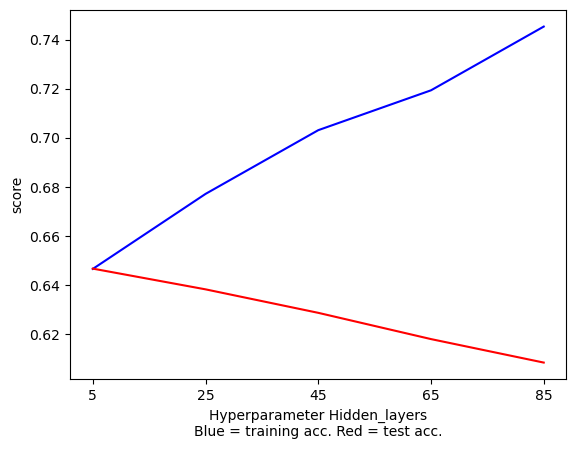

In [74]:
import matplotlib.pyplot as plt
train_result = result_set['split0_train_score']
test_result = result_set['split0_test_score']
print("Total number of models: ", len(test_result))
# plot hidden layers hyperparameter values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter Hidden_layers\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),range(5, 86, 20))
plt.ylabel('score')
plt.show()

Total number of models:  5


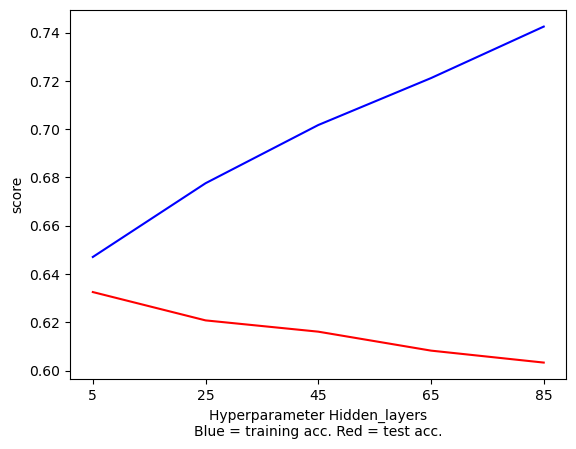

In [75]:
### Enter your code
train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']
print("Total number of models: ", len(test_result))
# plot hidden layers hyperparameter values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter Hidden_layers\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),range(5, 86, 20))
plt.ylabel('score')
plt.show()

In [76]:
print("Train accuracy:", cv_1.score(X_train, y_train))
print("Test accuracy:", cv_1.score(X_test, y_test))

y_pred = cv_1.predict(X_test)
print(classification_report(y_test, y_pred))

print(cv_1.best_params_)

Train accuracy: 0.646316738004055
Test accuracy: 0.6367279894875164
              precision    recall  f1-score   support

           0       0.64      0.74      0.69      8184
           1       0.63      0.52      0.57      7036

    accuracy                           0.64     15220
   macro avg       0.64      0.63      0.63     15220
weighted avg       0.64      0.64      0.63     15220

{'hidden_layer_sizes': (5,)}


In [77]:
# new parameters
params = {'hidden_layer_sizes': [(3,), (5,), (7,), (9,)]}

cv_2 = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs), cv=10, n_jobs=-1)
cv_2.fit(X_train, y_train)

print("Train accuracy:", cv_2.score(X_train, y_train))
print("Test accuracy:", cv_2.score(X_test, y_test))

y_pred = cv_2.predict(X_test)
print(classification_report(y_test, y_pred))

print(cv_2.best_params_)

Train accuracy: 0.6564259968461366
Test accuracy: 0.6389618922470434
              precision    recall  f1-score   support

           0       0.64      0.73      0.69      8184
           1       0.63      0.53      0.58      7036

    accuracy                           0.64     15220
   macro avg       0.64      0.63      0.63     15220
weighted avg       0.64      0.64      0.63     15220

{'hidden_layer_sizes': (9,)}


In [78]:
params = {'hidden_layer_sizes': [(3,), (5,), (7,), (9,)], 'alpha': [0.01,0.001, 0.0001, 0.00001]}

cv_3 = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs), cv=10, n_jobs=-1)
cv_3.fit(X_train, y_train)

print("Train accuracy:", cv_3.score(X_train, y_train))
print("Test accuracy:", cv_3.score(X_test, y_test))

y_pred = cv_3.predict(X_test)
print(classification_report(y_test, y_pred))

print(cv_3.best_params_)

Train accuracy: 0.6557501689569722
Test accuracy: 0.6377135348226018
              precision    recall  f1-score   support

           0       0.64      0.75      0.69      8184
           1       0.64      0.51      0.56      7036

    accuracy                           0.64     15220
   macro avg       0.64      0.63      0.63     15220
weighted avg       0.64      0.64      0.63     15220

{'alpha': 1e-05, 'hidden_layer_sizes': (9,)}


In [101]:
cv_3.get_params(deep = True)

{'cv': 10,
 'error_score': nan,
 'estimator__activation': 'relu',
 'estimator__alpha': 0.0001,
 'estimator__batch_size': 'auto',
 'estimator__beta_1': 0.9,
 'estimator__beta_2': 0.999,
 'estimator__early_stopping': False,
 'estimator__epsilon': 1e-08,
 'estimator__hidden_layer_sizes': (100,),
 'estimator__learning_rate': 'constant',
 'estimator__learning_rate_init': 0.001,
 'estimator__max_fun': 15000,
 'estimator__max_iter': 200,
 'estimator__momentum': 0.9,
 'estimator__n_iter_no_change': 10,
 'estimator__nesterovs_momentum': True,
 'estimator__power_t': 0.5,
 'estimator__random_state': 10,
 'estimator__shuffle': True,
 'estimator__solver': 'adam',
 'estimator__tol': 0.0001,
 'estimator__validation_fraction': 0.1,
 'estimator__verbose': False,
 'estimator__warm_start': False,
 'estimator': MLPClassifier(random_state=10),
 'n_jobs': -1,
 'param_grid': {'hidden_layer_sizes': [(3,), (5,), (7,), (9,)],
  'alpha': [0.01, 0.001, 0.0001, 1e-05]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,

In [109]:
num_iterations = len(cv_3.cv_results_['params'])
print("number of iteration:", len(cv_3.cv_results_['params']))


number of iteration: 16


In [79]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

rfe = RFECV(estimator = LogisticRegression(random_state=rs), cv=10)
rfe.fit(X_train, y_train)

print(rfe.n_features_)

73


In [80]:
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# step = int((X_train_rfe.shape[1] + 5)/5);
params = {'hidden_layer_sizes': [(3,), (5,), (7,), (9,)], 'alpha': [0.01,0.001, 0.0001, 0.00001]}

rfe_cv = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs), cv=10, n_jobs=-1)
rfe_cv.fit(X_train_rfe, y_train)

print("Train accuracy:", rfe_cv.score(X_train_rfe, y_train))
print("Test accuracy:", rfe_cv.score(X_test_rfe, y_test))

y_pred = rfe_cv.predict(X_test_rfe)
print(classification_report(y_test, y_pred))

print(rfe_cv.best_params_)

Train accuracy: 0.6403469249831043
Test accuracy: 0.6365308804204993
              precision    recall  f1-score   support

           0       0.64      0.76      0.69      8184
           1       0.64      0.49      0.56      7036

    accuracy                           0.64     15220
   macro avg       0.64      0.63      0.62     15220
weighted avg       0.64      0.64      0.63     15220

{'alpha': 0.01, 'hidden_layer_sizes': (3,)}


In [81]:
import pickle
with open('DT.pickle', 'rb') as f:
    dt_best,roc_index_dt_cv, fpr_dt_cv, tpr_dt_cv = pickle.load(f)

print(dt_best.best_params_)

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 15}


In [82]:
from dm_tools import analyse_feature_importance

analyse_feature_importance(dt_best.best_estimator_, X.columns)

number_inpatient : 0.5124390170845688
discharge_disposition_id : 0.1807736356322602
number_emergency : 0.05138292813765368
number_outpatient : 0.04097336768072232
number_diagnoses : 0.034998689159357096
diabetesMed : 0.029786940701675046
num_lab_procedures : 0.02776718554443898
medical_specialty_Invalid : 0.021659899376895945
num_medications : 0.018063101031205727
race_Caucasian : 0.011189253433262585
age_[80-90) : 0.007840017784502055
medical_specialty_InternalMedicine : 0.00748667197007605
admission_source_id : 0.00689616379429757
num_procedures : 0.005121322707953348
medical_specialty_Surgery-Cardiovascular/Thoracic : 0.005096281063767113
insulin_Up : 0.005077783330278622
admission_type_id : 0.004276511699128996
A1Cresult_>8 : 0.0033494465993485893
time_in_hospital : 0.003316160170573951
max_glu_serum_>300 : 0.003232277064011928


In [103]:
from sklearn.feature_selection import SelectFromModel

selectmodel = SelectFromModel(dt_best.best_estimator_, prefit=True)
X_train_sel_model = selectmodel.transform(X_train)
X_test_sel_model = selectmodel.transform(X_test)

print(X_train_sel_model.shape)

(35512, 10)


In [100]:
params = {'hidden_layer_sizes': [(3,), (5,), (7,), (9,)], 'alpha': [0.01,0.001, 0.0001, 0.00001]}

cv_sel_model = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs), cv=10, n_jobs=-1)
cv_sel_model.fit(X_train_sel_model, y_train)

print("Train accuracy:", cv_sel_model.score(X_train_sel_model, y_train))
print("Test accuracy:", cv_sel_model.score(X_test_sel_model, y_test))

y_pred = cv_sel_model.predict(X_test_sel_model)
print(classification_report(y_test, y_pred))

print(cv_sel_model.best_params_)

Train accuracy: 0.6399526920477585
Test accuracy: 0.6368593955321945
              precision    recall  f1-score   support

           0       0.64      0.76      0.69      8184
           1       0.64      0.50      0.56      7036

    accuracy                           0.64     15220
   macro avg       0.64      0.63      0.63     15220
weighted avg       0.64      0.64      0.63     15220

{'alpha': 1e-05, 'hidden_layer_sizes': (7,)}


In [110]:

print("number of iteration:", len(cv_sel_model.cv_results_['params']))

number of iteration: 16


In [111]:
train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']

max_depth_train = []
max_depth_test = []
index_
for i in range(len(index_)):
    max_depth_train.append(train_result[index_[i]])
    max_depth_test.append(test_result[index_[i]])
plt.plot(range(1, len(max_depth_train)+1), max_depth_train, 'b', range(1,len(max_depth_test)+1), max_depth_test, 'r')
plt.xlabel('Maximum depth (model complexity)\nBlue = training acc. Red = test acc.')
plt.xticks(np.arange(1, len(max_depth_train)+1, 1))
plt.ylabel('score')
plt.show()

IndexError: index 61 is out of bounds for axis 0 with size 5

In [85]:
from sklearn.metrics import roc_auc_score

y_pred_proba_nn_1 = model_1.predict_proba(X_test)
y_pred_proba_nn_2 = model_2.predict_proba(X_test)
y_pred_proba_cv_1 = cv_1.predict_proba(X_test)
y_pred_proba_cv_2 = cv_2.predict_proba(X_test)
y_pred_proba_cv_3 = cv_3.predict_proba(X_test)
y_pred_proba_rfe_cv = rfe_cv.predict_proba(X_test_rfe)
y_pred_proba_cv_sel_model = cv_sel_model.predict_proba(X_test_sel_model)


roc_index_nn_1 = roc_auc_score(y_test, y_pred_proba_nn_1[:, 1])
roc_index_nn_2 = roc_auc_score(y_test, y_pred_proba_nn_2[:, 1])
roc_index_cv_1 = roc_auc_score(y_test, y_pred_proba_cv_1[:, 1])
roc_index_cv_2 = roc_auc_score(y_test, y_pred_proba_cv_2[:, 1])
roc_index_cv_3 = roc_auc_score(y_test, y_pred_proba_cv_3[:, 1])
roc_index_rfe_cv = roc_auc_score(y_test, y_pred_proba_rfe_cv[:, 1])
roc_index_cv_sel_model = roc_auc_score(y_test, y_pred_proba_cv_sel_model[:, 1])


print("ROC index on test for NN_default:", roc_index_nn_1)
print("ROC index on test for NN with relu:", roc_index_nn_2)
print("ROC index on test for NN with gridsearch 1:", roc_index_cv_1)
print("ROC index on test for NN with gridsearch 2:", roc_index_cv_2)
print("ROC index on test for NN with gridsearch 3:", roc_index_cv_3)
print("ROC index on test for NN with feature selection and gridsearch:", roc_index_rfe_cv)
print("ROC index on test for NN with feature selection (model selection) and gridsearch:", roc_index_cv_sel_model)

from sklearn.metrics import roc_curve

fpr_nn_1, tpr_nn_1, thresholds_nn_1 = roc_curve(y_test, y_pred_proba_nn_1[:,1])
fpr_nn_2, tpr_nn_2, thresholds_nn_2 = roc_curve(y_test, y_pred_proba_nn_2[:,1])
fpr_cv_1, tpr_cv_1, thresholds_cv_1 = roc_curve(y_test, y_pred_proba_cv_1[:,1])
fpr_cv_2, tpr_cv_2, thresholds_cv_2 = roc_curve(y_test, y_pred_proba_cv_2[:,1])
fpr_cv_3, tpr_cv_3, thresholds_cv_3 = roc_curve(y_test, y_pred_proba_cv_3[:,1])
fpr_rfe_cv, tpr_rfe_cv, thresholds_rfe_cv = roc_curve(y_test, y_pred_proba_rfe_cv[:,1])
fpr_cv_sel_model, tpr_cv_sel_model, thresholds_cv_sel_model = roc_curve(y_test, y_pred_proba_cv_sel_model[:,1])

ROC index on test for NN_default: 0.6393487208919135
ROC index on test for NN with relu: 0.6352768328167886
ROC index on test for NN with gridsearch 1: 0.6777195061482436
ROC index on test for NN with gridsearch 2: 0.6813857944368773
ROC index on test for NN with gridsearch 3: 0.6801807781458519
ROC index on test for NN with feature selection and gridsearch: 0.6779795932884198
ROC index on test for NN with feature selection (model selection) and gridsearch: 0.6811220950959095


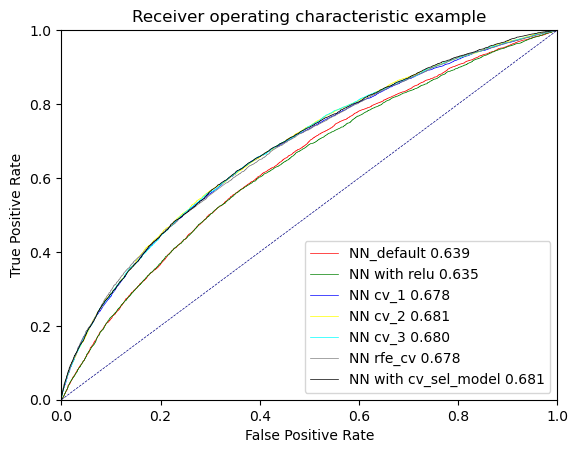

In [86]:
import matplotlib.pyplot as plt

plt.plot(fpr_nn_1, tpr_nn_1, label='NN_default {:.3f}'.format(roc_index_nn_1), color='red', lw=0.5)
plt.plot(fpr_nn_2, tpr_nn_2, label='NN with relu {:.3f}'.format(roc_index_nn_2), color='green', lw=0.5)
plt.plot(fpr_cv_1, tpr_cv_1, label='NN cv_1 {:.3f}'.format(roc_index_cv_1), color='blue', lw=0.5)
plt.plot(fpr_cv_2, tpr_cv_2, label='NN cv_2 {:.3f}'.format(roc_index_cv_2), color='yellow', lw=0.5)
plt.plot(fpr_cv_3, tpr_cv_3, label='NN cv_3 {:.3f}'.format(roc_index_cv_3), color='cyan', lw=0.5)
plt.plot(fpr_rfe_cv, tpr_rfe_cv, label='NN rfe_cv {:.3f}'.format(roc_index_rfe_cv), color='gray', lw=0.5)
plt.plot(fpr_cv_sel_model, tpr_cv_sel_model, label='NN with cv_sel_model {:.3f}'.format(roc_index_cv_sel_model), color='black', lw=0.5)


plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

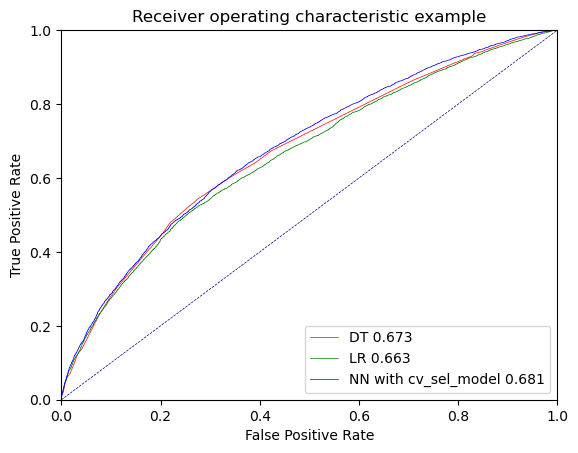

In [87]:
### Enter your code
import pickle
with open('DT.pickle', 'rb') as f:
    dt_best,roc_index_dt_cv, fpr_dt_cv, tpr_dt_cv = pickle.load(f)
with open('LR.pickle', 'rb') as f:
    lr_best,roc_index_lr_cv, fpr_lr_cv, tpr_lr_cv = pickle.load(f)   
    

plt.plot(fpr_dt_cv, tpr_dt_cv, label='DT {:.3f}'.format(roc_index_dt_cv), color='red', lw=0.5)
plt.plot(fpr_lr_cv, tpr_lr_cv, label='LR {:.3f}'.format(roc_index_lr_cv), color='green', lw=0.5)
plt.plot(fpr_cv_sel_model, tpr_cv_sel_model, label='NN with cv_sel_model {:.3f}'.format(roc_index_cv_sel_model), color='blue', lw=0.5)

plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show() 

In [88]:
# import the model
from sklearn.ensemble import VotingClassifier

# load the best performing decision tree and logistic regression models that we have saved from last two pracs
import pickle
with open('DT.pickle', 'rb') as f:
    dt_best,roc_index_dt, fpr_dt, tpr_dt = pickle.load(f)
with open('LR.pickle', 'rb') as f:
    lr_best,roc_index_lr, fpr_lr, tpr_lr = pickle.load(f)    

# select the best performing neural network
nn_best = cv_sel_model

# initialise the classifier with 3 different estimators
voting = VotingClassifier(estimators=[('dt', dt_best), ('lr', lr_best), ('nn', nn_best)], voting='soft')

In [89]:
# fit the voting classifier to training data
voting.fit(X_train, y_train)

# evaluate train and test accuracy
print("Ensemble train accuracy:", voting.score(X_train, y_train))
print("Ensemble test accuracy:", voting.score(X_test, y_test))

# evaluate ROC auc score
y_pred_proba_ensemble = voting.predict_proba(X_test)
roc_index_ensemble = roc_auc_score(y_test, y_pred_proba_ensemble[:, 1])
print("ROC score of voting classifier:", roc_index_ensemble)

Ensemble train accuracy: 0.6560036044154088
Ensemble test accuracy: 0.6448751642575559
ROC score of voting classifier: 0.6911570059745801
